# Time Series Ticket Priority Forecasting

Time series ticket forecasting helps businesses assess the number of tickets that can be generate at each priority level based on historic data. This will help businesses assess the human resource required to resolve the issues and allocate more people if necessary. It uses VAR algorithms.  


## Contents

1. Prequisites
1. Data Dictionary
1. Import Libraries
1. Sample Input Data
1. Create Model
1. Predict Future Datapoints
1. Plot the DataFrame
1. Saving Forecast

### Prerequisites

To run this algorithm you need to have install following packages:
- "pandas" to read/save csv files.
- "numpy"
- "statsmodels" to forecast data.



### Data Dictionary

- The input has to be a '.csv' file with 'utf-8' encoding. PLEASE NOTE: If your input .csv file is not 'utf-8' encoded, model   will not perform as expected
1. Have an unique identifier column called 'maskedsku'. eg. 'maskedsku' can be shipmentid
2. The date format of the columns should be: 'YYYY-MM-DD'

## Import Libraries

In [2]:
import numpy as np

import pandas as pd

import statsmodels.api as sm

from statsmodels.tsa.api import VAR

### Sample input data

In [3]:
# read the sample csv
df = pd.read_csv("sample.csv",index_col = [0])
# Pivot the data
df = df.T
df

maskedsku,P1,P2,P3
2018-08-01 12:00,13380.82192,20433.83014,14866.84932
2018-08-01 13:00,15244.93151,10600.76712,14915.34247
2018-08-01 14:00,14925.20548,12656.87671,17090.63014
2018-08-01 15:00,13585.97260,20317.80822,11294.46575
2018-08-01 16:00,11365.47945,14872.76712,20696.71233
2018-08-01 17:00,20060.54795,15046.35616,11879.67123
2018-08-01 18:00,12861.36986,19864.93151,12768.00000
2018-08-01 19:00,14945.22740,14184.98630,22173.69863
2018-08-01 20:00,14490.37808,12370.84932,16171.39726
2018-08-01 21:00,12208.53699,19949.58904,17321.45753


In [4]:
#df = df.diff().dropna()

## Create Model

Now we use the Model Package to create a model

In [5]:

m = VAR(df)
res = m.fit(10)

res.summary()



/opt/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/opt/miniconda/lib/python3.7/site-packages/statsmodels/tsa/vector_ar/var_model.py:1545: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 24, Nov, 2021
Time:                     07:20:03
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -138.501
Nobs:                     25.0000    HQIC:                  -141.777
Log likelihood:           1774.52    FPE:               -3.62750e-63
AIC:                     -143.035    Det(Omega_mle):    -3.22748e-64
--------------------------------------------------------------------
Results for equation P1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.000002              NAN              NAN             NAN
L1.P1          0.017041              NAN              NAN             NAN
L1.P2         -0.131961              NAN              NAN             NAN
L1.P3          0.

# Predict Future datapoints

In [6]:
lag_order = res.k_ar
res.forecast(df.values[-lag_order:], 12)

array([[18781.8173216 , 11971.56464815, 12857.27832387],
       [16673.80671196, 19801.30400442, 13094.12765941],
       [17381.64073438, 14067.34731449, 17896.60150423],
       [17728.09114463, 13265.54781495, 15275.4801406 ],
       [14441.476253  , 19719.75634553, 14565.54460766],
       [17764.09148827, 13520.1027192 , 14208.45409775],
       [15902.17804214, 21457.14007729, 11595.86868397],
       [15611.80895387, 11345.19835533, 16870.96738686],
       [18379.95460488, 16650.40074515, 12493.06044428],
       [15756.11717189, 16544.51563847, 17200.65985917],
       [14834.97475817, 16809.74754504, 13056.18720977],
       [15295.64143529, 19273.77914333, 14880.60482646]])

## Plot the forecast dataframe

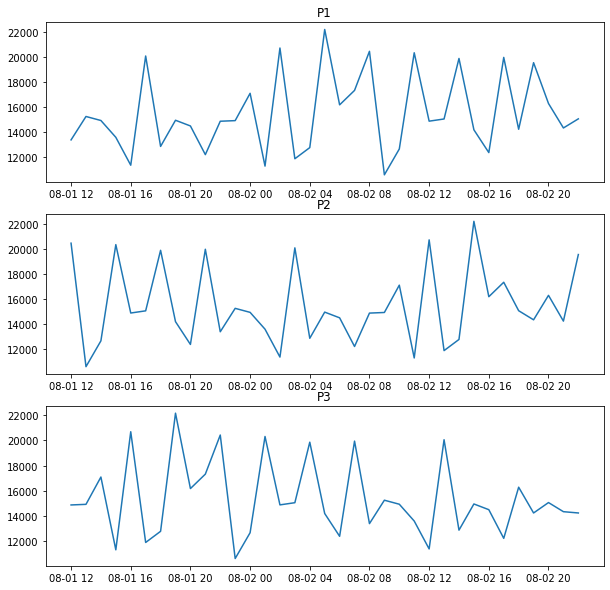

In [7]:
# Python
fig1 = res.plot()

## Saving Forecast

In [8]:
forecast =pd.DataFrame()
forecast.index = pd.date_range(start ='2018-08-03 0:00',end='2018-08-03 22:00',freq='h')

In [9]:
forecast[['P1','P2','P3']] = res.forecast(df.values[-lag_order:], 23)
forecast.to_csv('result.csv',index=False)